## Optimization with a mix of continuous and discrete variables

Populating the interactive namespace from numpy and matplotlib
-----
----- Running demo. It may take a few seconds.
-----
Optimization restart 1/5, f = 4.46342497175
Optimization restart 2/5, f = 4.46342653678
Optimization restart 3/5, f = 4.46342494406
Optimization restart 4/5, f = 4.46342754324
Optimization restart 5/5, f = 4.46342552559
Optimization restart 1/5, f = 4.89205031697
Optimization restart 2/5, f = 4.89205074831
Optimization restart 3/5, f = 4.87714415828
Optimization restart 4/5, f = 4.87714448979
Optimization restart 5/5, f = 4.89203137258
Optimization restart 1/5, f = 5.86456285599
Optimization restart 2/5, f = 5.86456273994
Optimization restart 3/5, f = 5.86456291456
Optimization restart 4/5, f = 5.86456665947
Optimization restart 5/5, f = 5.76049770764
Optimization restart 1/5, f = 5.90786736515
Optimization restart 2/5, f = 5.74737514401
Optimization restart 3/5, f = 5.74737524715
Optimization restart 4/5, f = 5.74737511253
Optimization restart 5/5, f = 5.7473750951

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
 /home/javier/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


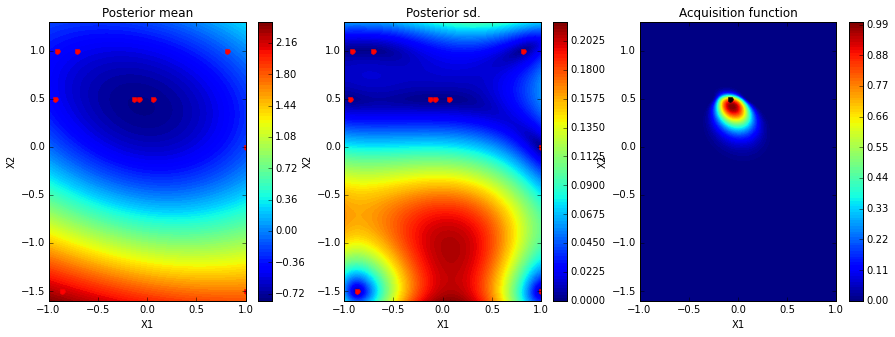

In [2]:
%pylab inline
import GPyOpt
from numpy.random import seed
seed(1234)
        
# --- Fucntion to optimize
func  = GPyOpt.objective_examples.experiments2d.sixhumpcamel() 
#func  = GPyOpt.objective_examples.experiments1d.forrester() 

# --- Space design
space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)},
                                    {'name': 'var_2', 'type': 'discrete', 'domain': (-1.5,-1,0,.5,1, 1.2)}])

# --- Objective
objective = GPyOpt.core.task.SingleObjective(func.f, space)

# --- CHOOSE the model type
model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)

# --- CHOOSE the acquisition optimizer
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)

# --- CHOOSE the type of acquisition
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, space, optimizer=aquisition_optimizer)

# --- CHOOSE the intial design
initial_design = GPyOpt.util.stats.initial_design('random', space, 5)

# BO object
bo = GPyOpt.core.BO(model, space, objective, acquisition, initial_design)

print '-----'
print '----- Running demo. It may take a few seconds.'
print '-----'

# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance, verbose=False) 
bo.plot_acquisition()

In [1]:
bo.objective.cost(initial_design)

NameError: name 'bo' is not defined

In [4]:
initial_design

array([[-0.71124774,  1.        ],
       [-0.86556335, -1.5       ],
       [ 0.81226927,  1.        ],
       [-0.91947167,  1.        ],
       [-0.94063342,  0.5       ]])